In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def gen_data_matrix(x, degree):
    
    # Initialize data matrix X
    X = np.zeros((x.shape[0], degree + 1))
    
    # Add features to X
    for d in range(degree + 1):
        X[:, d] = x ** d
    
    return X

In [3]:
def fit_polynomials(X, y):

    # Convert target vector y to column vector
    Y = y.reshape((-1, 1))
            
    # Compute OLS solution
    A = np.matmul(X.transpose(),X)
    b = np.matmul(X.transpose(),Y)
    weight = np.linalg.solve(A, b)
    
    # Model prediction
    y_pred = X @ weight
    #y_pred = np.matmul(X, weight)

    return weight, y_pred

### Synthetic Data Generation
1. Define a true model
2. Sample training/validation data sets

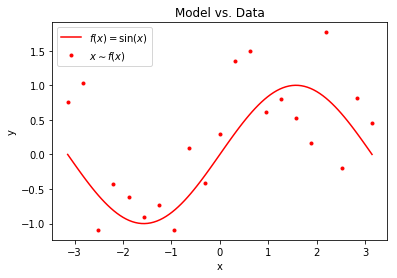

In [4]:
num_sample = 21
# ======================= Data Generation ===============================
# Training data x
x_train = np.linspace(-math.pi, math.pi, num_sample)
# Training data y
y_train = np.sin(x_train) + np.random.normal(loc=0, scale=0.5, size=num_sample)

# Validation data x
x_val = np.linspace(-math.pi, math.pi, num_sample//2)
# Validation data y
y_val  = np.sin(x_val) + np.random.normal(loc=0, scale=0.5, size=num_sample//2)

# ==================== Visualize Model & Data ============================
x_true = np.linspace(-math.pi, math.pi, 100)
plt.plot(x_true, np.sin(x_true), 'r', label='$f(x)=\sin (x)$')
plt.plot(x_train, y_train, 'r.', label='$x \sim f(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')
plt.show()

### Polynomial Model Fitting

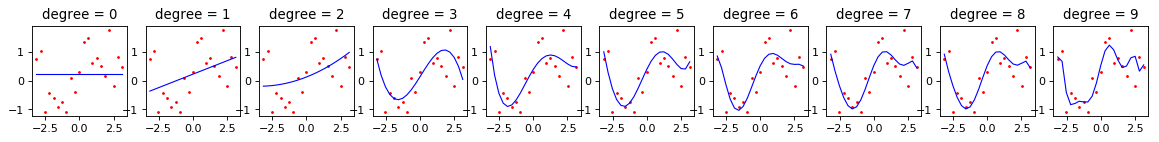

In [5]:
# ======================= Hyperparameter ===============================
d_max = 10
# ====================== Matplotlib Figure ===============================
fig, axes = plt.subplots(nrows=1, ncols=d_max, figsize=(d_max+8, 1.5), dpi=80)

mse_train = []
mse_val  = []

for degree in range(d_max):

    X_train = gen_data_matrix(x_train, degree)
    weight, y_train_pred = fit_polynomials(X_train, y_train)
    
    X_val = gen_data_matrix(x_val, degree)
    y_val_pred = X_val @ weight
    
    # Compute Mean Squared Error (MSE)
    mse_train.append(np.mean((y_train - y_train_pred.reshape(-1)) ** 2))
    mse_val.append(np.mean((y_val - y_val_pred.reshape(-1)) ** 2))

    # Plot data and model
    axes[degree].plot(x_train, y_train, 'r.', ms=3)
    axes[degree].plot(x_train, y_train_pred, 'b', lw=1)
    axes[degree].set_title('degree = ' + str(degree))

plt.show()

### Visualization of Overfitting

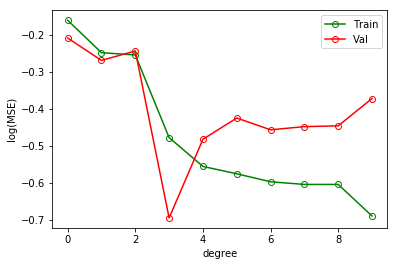

In [6]:
plt.plot(np.log10(mse_train),'go-', mfc='none', label='Train')
plt.plot(np.log10(mse_val),'ro-', mfc='none', label='Val')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.legend()
plt.show()